<a href="https://colab.research.google.com/github/22410154/churn_Project/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



## Loading Data


In [8]:

client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [9]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


## Descriptive  stat of Data


In [11]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44043 entries, 0 to 44042
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44043 non-null  object 
 1   price_date          44042 non-null  object 
 2   price_off_peak_var  44042 non-null  float64
 3   price_peak_var      44042 non-null  float64
 4   price_mid_peak_var  44042 non-null  float64
 5   price_off_peak_fix  44042 non-null  float64
 6   price_peak_fix      44042 non-null  float64
 7   price_mid_peak_fix  44042 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.7+ MB


## Statistics

In [13]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [14]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,44042.000000,44042.000000,44042.000000,44042.000000,44042.000000,44042.000000
mean,0.140782,0.054989,0.031652,43.341558,10.980261,6.641213
std,0.024386,0.050169,0.036575,5.187460,12.889384,7.820803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125746,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.145684,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151367,0.102232,0.072846,44.444710,24.339581,16.226389
max,0.280700,0.169536,0.114102,59.444710,36.490692,17.458221


In [15]:
client_df.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [23]:
price_df.isnull().sum()

,0
id,0
price_date,1
price_off_peak_var,1
price_peak_var,1
price_mid_peak_var,1
price_off_peak_fix,1
price_peak_fix,1
price_mid_peak_fix,1


In [24]:
price_df[price_df.isnull().any(axis=1)]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
44042,b0d99dba8a43317782f965a,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
price_df = price_df.dropna()

## Data Visualization

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

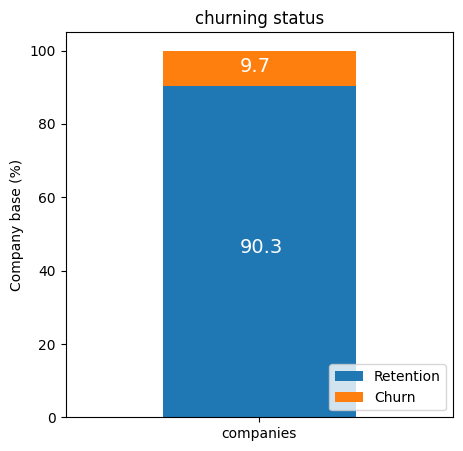

In [17]:
churn = client_df[['id', 'churn']]
churn.columns = ['companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "churning status", (5, 5), legend_="lower right")

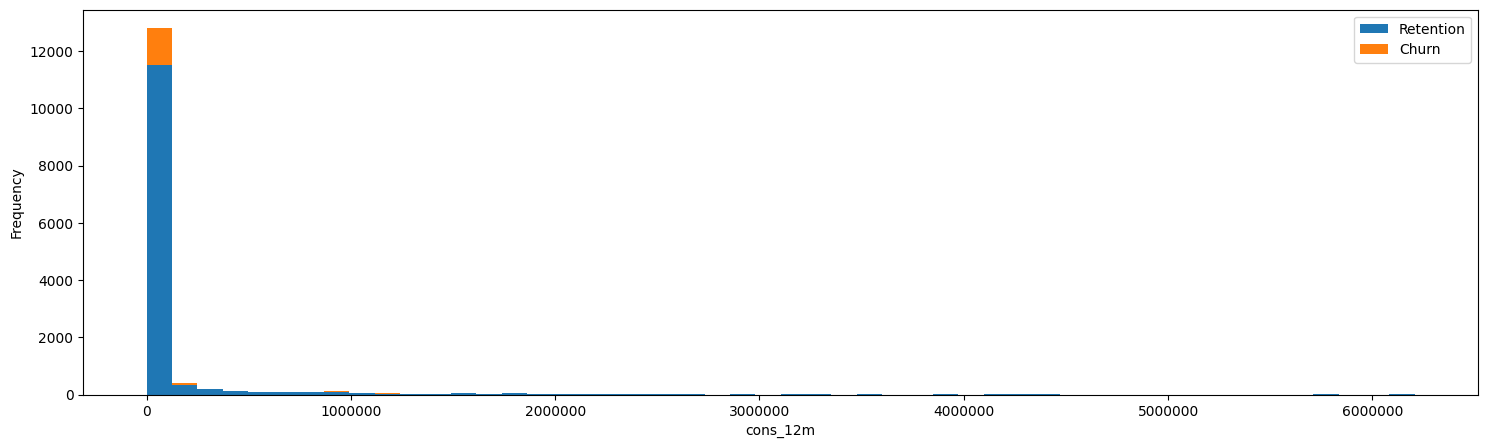

In [18]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

Price distribution over Time

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2015-01-01'),
  Text(1, 0, '2015-02-01'),
  Text(2, 0, '2015-03-01'),
  Text(3, 0, '2015-04-01'),
  Text(4, 0, '2015-05-01'),
  Text(5, 0, '2015-06-01'),
  Text(6, 0, '2015-07-01'),
  Text(7, 0, '2015-08-01'),
  Text(8, 0, '2015-09-01'),
  Text(9, 0, '2015-10-01'),
  Text(10, 0, '2015-11-01'),
  Text(11, 0, '2015-12-01')])

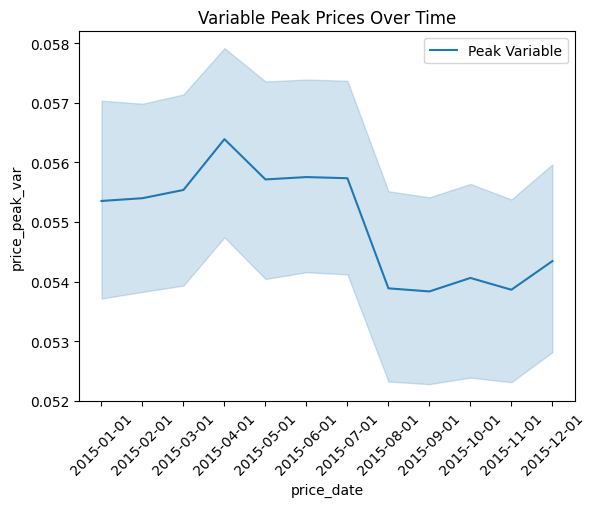

In [19]:

sns.lineplot(data=price_df, x='price_date', y='price_peak_var', label='Peak Variable')
plt.title("Variable Peak Prices Over Time")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Fixed vs. Variable Off-Peak Prices')

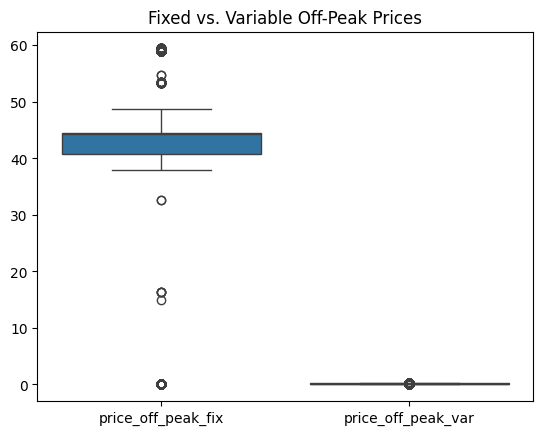

In [20]:
sns.boxplot(data=price_df[['price_off_peak_fix', 'price_off_peak_var']])
plt.title("Fixed vs. Variable Off-Peak Prices")

In [27]:
# Convert dates
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client_df[col] = pd.to_datetime(client_df[col], errors='coerce')

price_df['price_date'] = pd.to_datetime(price_df['price_date'], errors='coerce')

client_df[date_columns].head()


,date_activ,date_end,date_modif_prod,date_renewal
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23
1,2009-08-21,2016-08-30,2009-08-21,2015-08-31
2,2010-04-16,2016-04-16,2010-04-16,2015-04-17
3,2010-03-30,2016-03-30,2010-03-30,2015-03-31
4,2010-01-13,2016-03-07,2010-01-13,2015-03-09


In [28]:
price_df['price_date'].head()

,price_date
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01


In [30]:
# Tenure
client_df['tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days

# Last modification Days
today = client_df['date_renewal'].max()
client_df['last_modif_days'] = ( today - client_df['date_modif_prod']).dt.days

# Days before renewal
client_df['days_before_renewal'] = (client_df['date_renewal'] - today).dt.days
client_df[['tenure', 'last_modif_days']].head()

,tenure,last_modif_days
0,1096,88
1,2566,2351
2,2192,2113
3,2192,2130
4,2245,2206


In [31]:
today

Timestamp('2016-01-28 00:00:00')

In [35]:
# Aggretate Price data.

price_ag = price_df.groupby('id').agg({
    'price_off_peak_var': ['mean', 'std'],
    'price_peak_var': ['mean', 'std'],
    'price_mid_peak_var': ['mean', 'std'],
    'price_off_peak_fix': ['mean', 'std'],
    'price_peak_fix': ['mean', 'std'],
    'price_mid_peak_fix': ['mean', 'std'],
}).reset_index()

# Flattern colums name
price_ag.columns = ['id'] + ['_'.join(col).strip() for col in price_ag.columns[1:]]

# Merge data
client_df = client_df.merge(price_ag, on='id', how='left')

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_peak_var_mean,price_peak_var_std,price_mid_peak_var_mean,price_mid_peak_var_std,price_off_peak_fix_mean,price_off_peak_fix_std,price_peak_fix_mean,price_peak_fix_std,price_mid_peak_fix_mean,price_mid_peak_fix_std
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,0.000506,0.0,0.0,44.38545,0.087532,0.0,0.0,0.0,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
client_df.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [40]:
# filling missing date_end using today

client_df['date_end'] = client_df['date_end'].fillna(today)

# Recalculate tenure days.
client_df['tenure'] = (client_df['date_end'] - client_df['date_activ']).dt.days

# Drop that null row for date actie
client_df = client_df[client_df['date_activ'].notnull()]

#  Days modified
client_df['last_modif_days'] = (today - client_df['date_modif_prod']).dt.days
client_df['days_before_renewal'] = (client_df['date_renewal'] - today).dt.days

# fill missing date with -1
client_df['last_modif_days'] = client_df['last_modif_days'].fillna(-1)
client_df['days_before_renewal'] = client_df['days_before_renewal'].fillna(-1)

price_col = [col for col in client_df.columns if '_mean' in col or '_std' in col ]

# Add flag info exist or 0 if not
client_df['has_price_info'] = client_df[price_col[0]].notnull().astype(int)

# fill all Pirce nan with 0
client_df[price_col] = client_df[price_col].fillna(0)

client_df.isnull().sum()

,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [43]:
client_df.dtypes

,0
id,object
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,datetime64[ns]
date_end,datetime64[ns]
date_modif_prod,datetime64[ns]
date_renewal,datetime64[ns]
forecast_cons_12m,float64


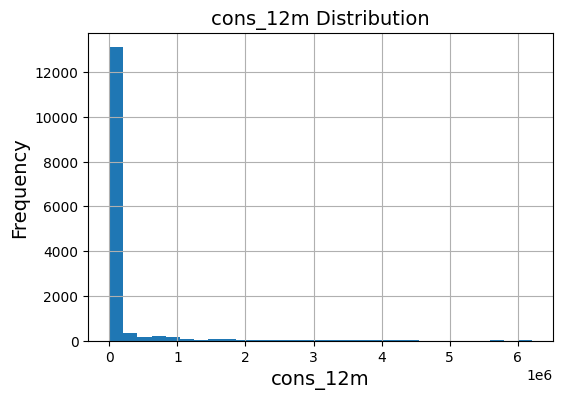

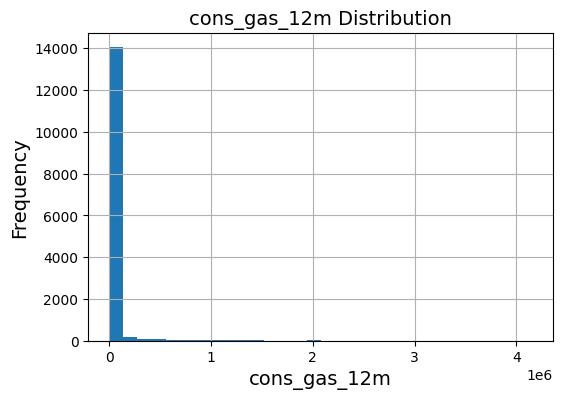

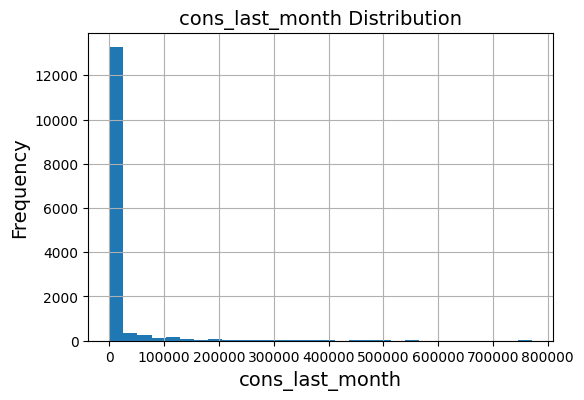

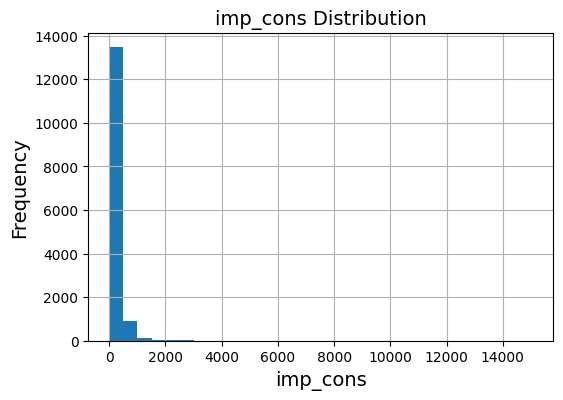

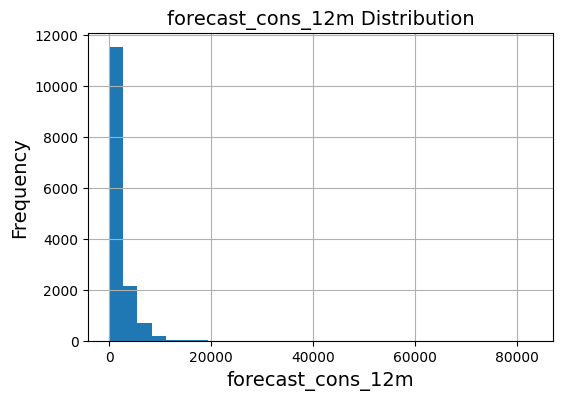

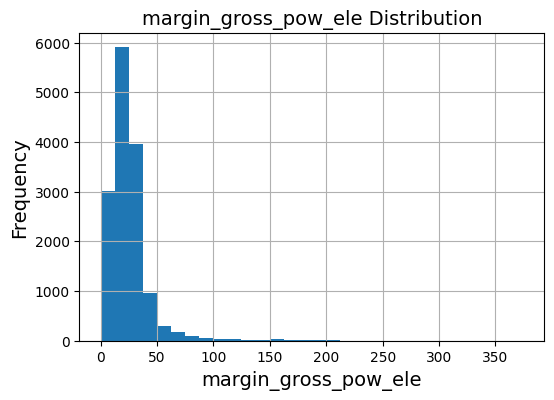

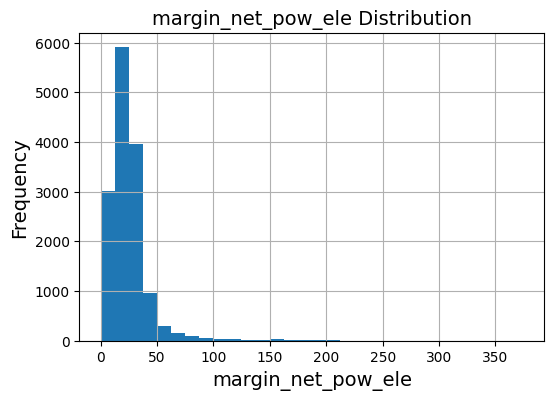

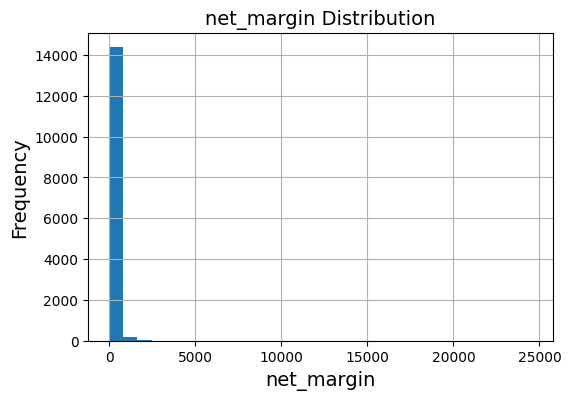

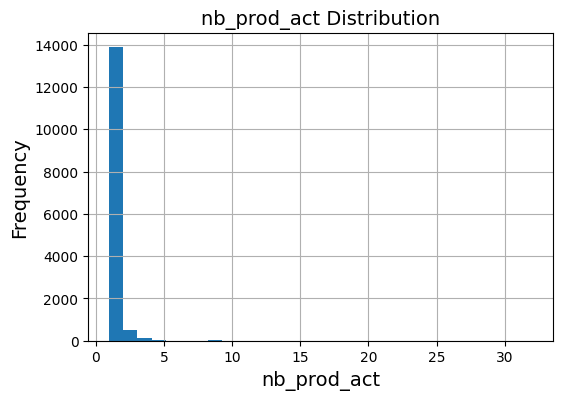

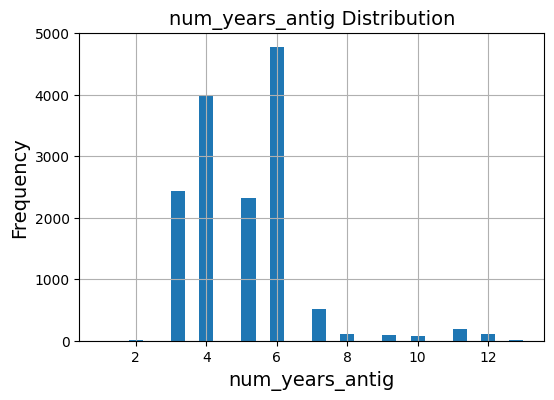

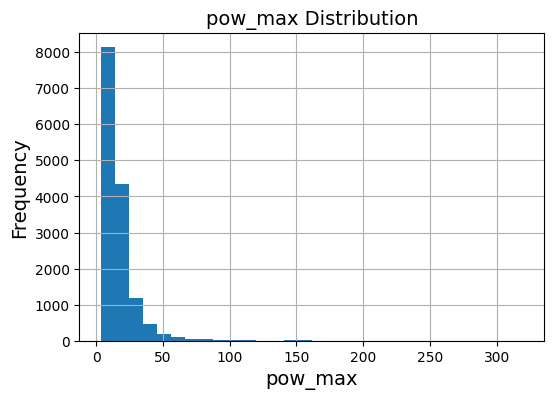

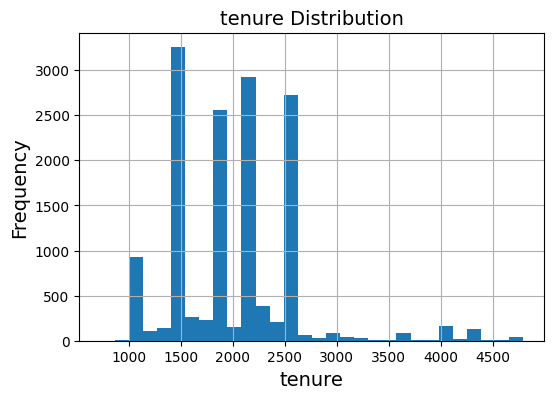

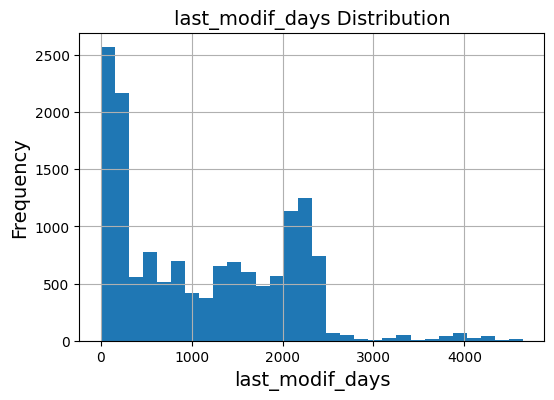

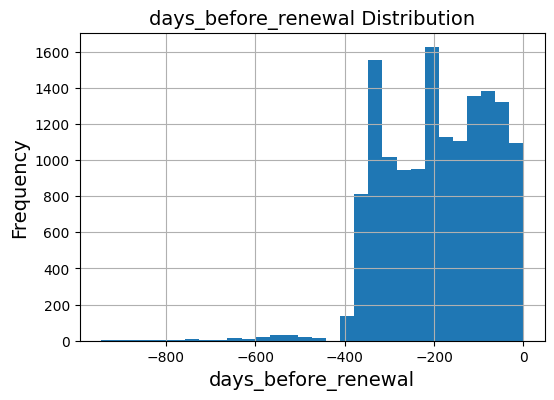

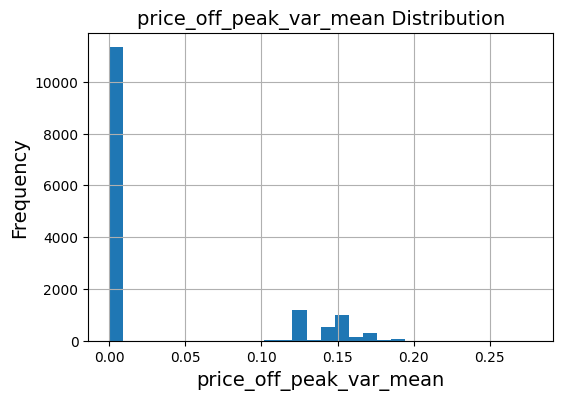

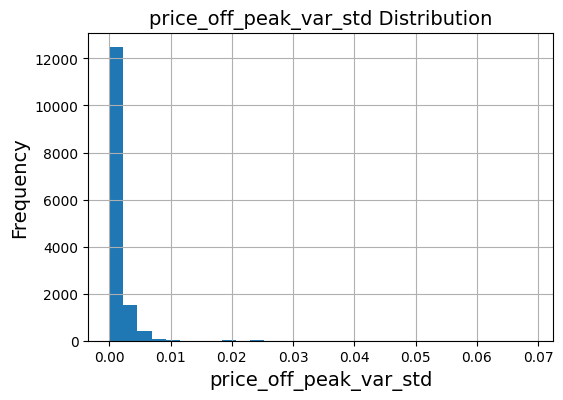

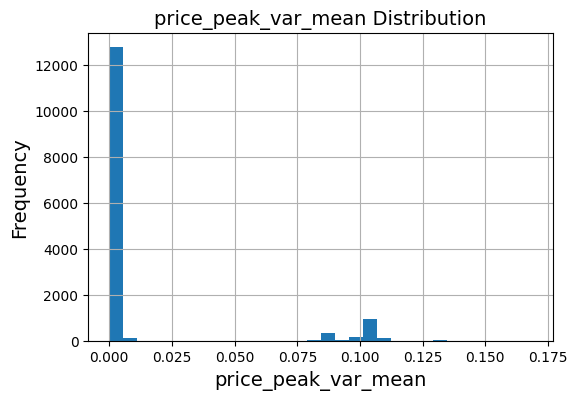

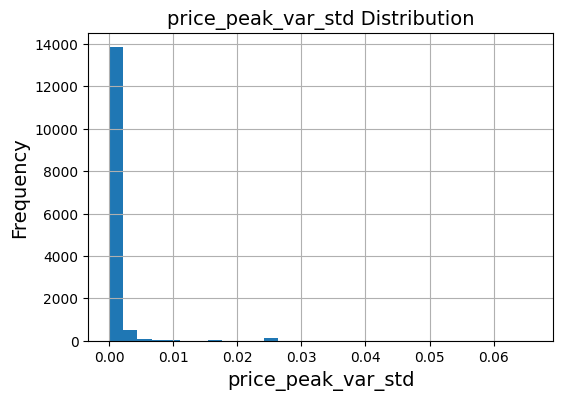

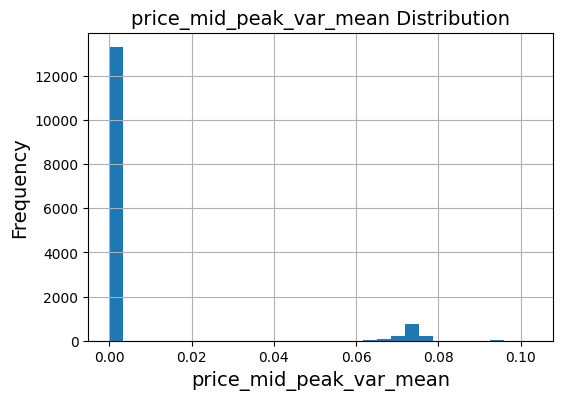

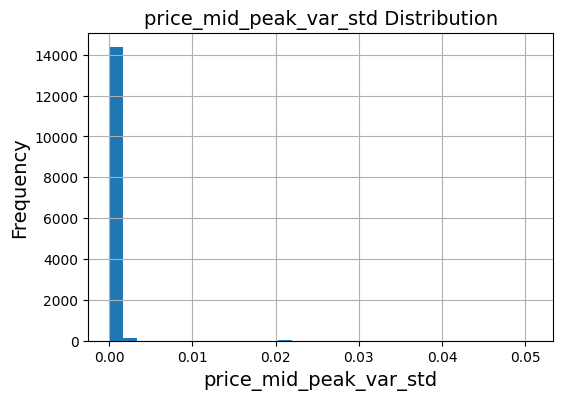

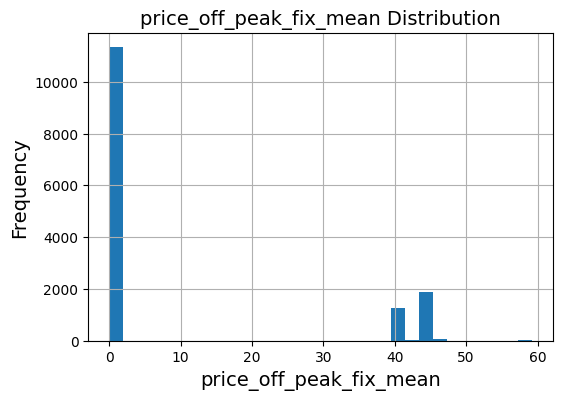

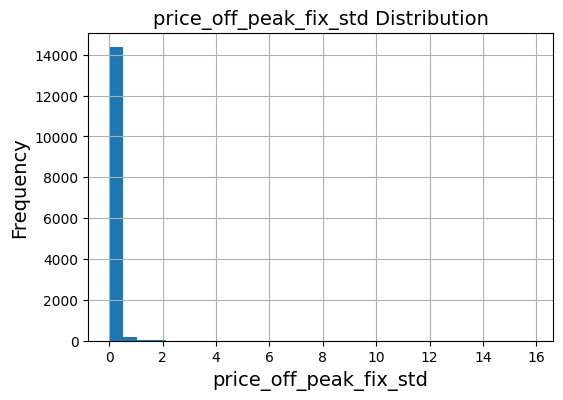

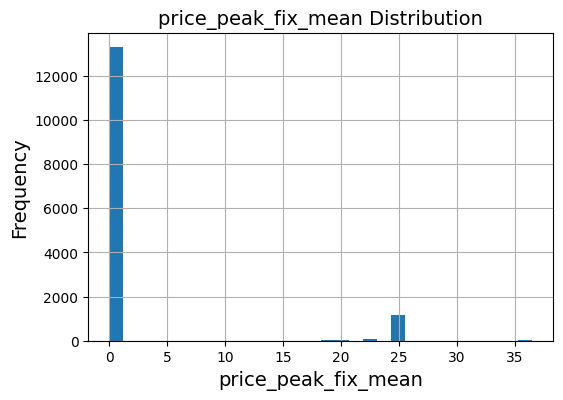

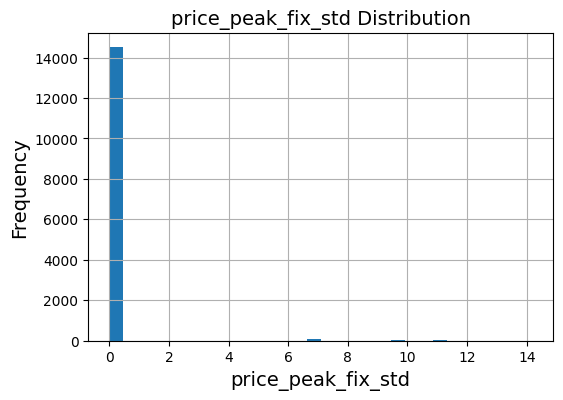

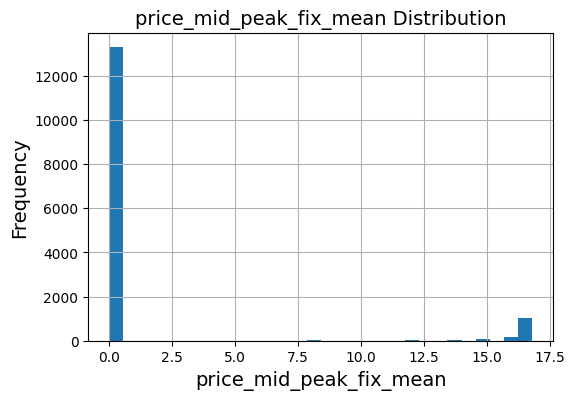

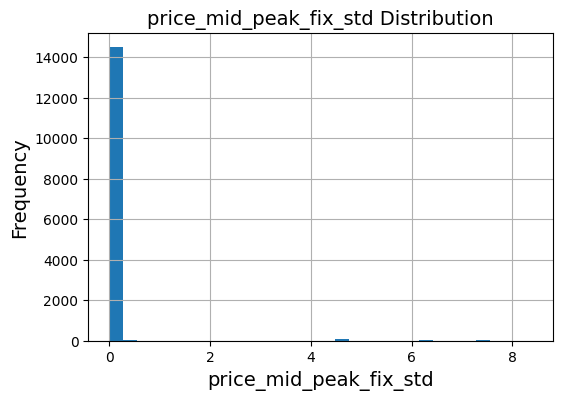

In [47]:
# Num features
num_cols = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons',
    'forecast_cons_12m', 'margin_gross_pow_ele', 'margin_net_pow_ele',
    'net_margin', 'nb_prod_act', 'num_years_antig', 'pow_max', 'tenure',
    'last_modif_days', 'days_before_renewal',
]

# Add price col
price_col = [col for col in client_df.columns if '_mean' in col or '_std' in col ]
num_cols += price_col

# Hist

for col in num_cols:
  plt.figure(figsize=(6,4))
  client_df[col].hist(bins=30)
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [51]:
# using log to handle tail

import numpy as np


num_cols = client_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('churn')

client_df[num_cols].min()

,0
cons_12m,-inf
cons_gas_12m,0.874591
cons_last_month,0.000000
forecast_cons_12m,0.000000
forecast_cons_year,0.000000
forecast_discount_energy,0.000000
forecast_meter_rent_12m,0.000000
forecast_price_energy_off_peak,0.000000
forecast_price_energy_peak,0.000000
forecast_price_pow_off_peak,0.000000


In [61]:
for col in num_cols:
    client_df[col + '_log'] = np.log1p(client_df[col])



/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [54]:
[col + 'log' for col in num_cols]

['cons_12mlog',
 'cons_gas_12mlog',
 'cons_last_monthlog',
 'forecast_cons_12mlog',
 'forecast_cons_yearlog',
 'forecast_discount_energylog',
 'forecast_meter_rent_12mlog',
 'forecast_price_energy_off_peaklog',
 'forecast_price_energy_peaklog',
 'forecast_price_pow_off_peaklog',
 'imp_conslog',
 'margin_gross_pow_elelog',
 'margin_net_pow_elelog',
 'nb_prod_actlog',
 'net_marginlog',
 'num_years_antiglog',
 'pow_maxlog',
 'tenurelog',
 'last_modif_dayslog',
 'days_before_renewallog',
 'price_off_peak_var_meanlog',
 'price_off_peak_var_stdlog',
 'price_peak_var_meanlog',
 'price_peak_var_stdlog',
 'price_mid_peak_var_meanlog',
 'price_mid_peak_var_stdlog',
 'price_off_peak_fix_meanlog',
 'price_off_peak_fix_stdlog',
 'price_peak_fix_meanlog',
 'price_peak_fix_stdlog',
 'price_mid_peak_fix_meanlog',
 'price_mid_peak_fix_stdlog',
 'has_price_infolog']

Text(0.5, 1.0, 'cons_gas_12mlog Distribution')

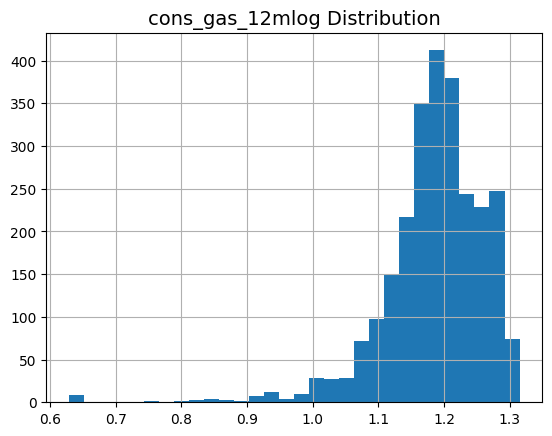

In [56]:
client_df['cons_gas_12m_log'].hist(bins=30)
plt.title(f'cons_gas_12mlog Distribution')


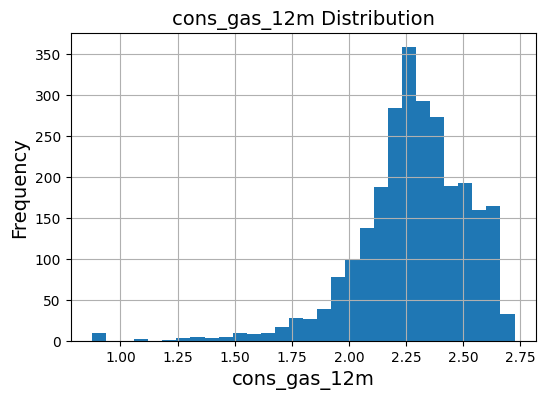

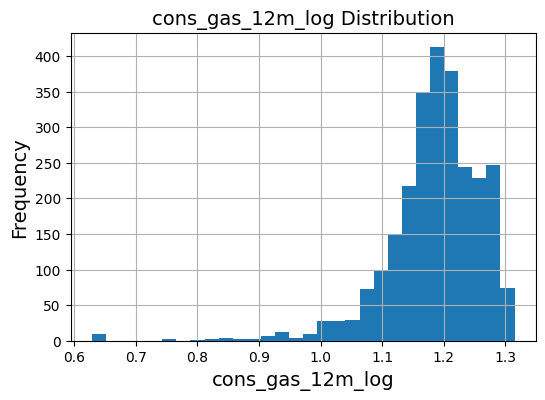

In [60]:
cols_to_check = ['cons_gas_12m', 'cons_gas_12m_log']

for col in cols_to_check:
    plt.figure(figsize=(6, 4))
    client_df[col].hist(bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()